### Introduction
This package provides the `ExplicitRK` class, a generic implementation of an n-stage, explicit Runge-Kutta (RK) method. RK methods are suited to solve first-order ordinary differential equations, i.e. ODEs of the form $$\frac{\mathrm{d}\boldsymbol{y}}{\mathrm{d}t} = \boldsymbol{f}(t, \boldsymbol{y}(t)), \quad \boldsymbol{y}(t_0) = \boldsymbol{y}_0, \quad t_0 \leq t \leq t_f,$$ where $\boldsymbol{y} \in \mathbb{R}^d$ is assumed to be differentiable and $\boldsymbol{f} \in \mathbb{R}^d$ is assumed to be analytic and Lipschitz continuous. Note that any $d$th order ODE can be converted into $d$ first-order ODEs, meaning Runge-Kutta methods are capable of solving an ODE of any order, so long as the ODE is reduced to first-order system.

### Example: Euler's method and the exponential ODE
To demonstrate the basic usage of this package, we will solve perhaps the simplest (non-trivial) ODE, $$\frac{\mathrm{d}y}{\mathrm{d}t} = y(t), \quad y(0) = 1, \quad 0 \leq t \leq 1,$$
using the simplest explicit RK method, the forward Euler method. Recall that $y' = y$ with $y(0) = 1$ has the exact solution $y(x) = \exp(x)$, allowing us to assess the numerical solutions by comparing them to the exact solution.

To begin, by comparing this particular ODE to the general form of a first-order ODE, we see that $$f(t, y(t)) = y(t).$$ Therefore, we implement $f(t, y(t))$ for this problem in Python as follows:

In [1]:
def f(t, y):
    return y

Next, recall that Runge-Kutta methods are defined by the Runge-Kutta matrix $A$, the Runge-Kutta weights vector $b$, and the Runge-Kutta nodes vector $c$. For Euler's method, $$A = [0], \quad b = [1], \quad c = [0].$$ Thus, after importing `ExplicitRK` from `explicit_rk.py`, Euler's method can be implemented in Python as

In [2]:
import numpy as np
import sys
sys.path.append("../src")
from explicit_rk import ExplicitRK

euler_method = ExplicitRK(
    name = "Euler's Method",
    A = np.array([[0.0]]),
    b = np.array([1.0]),
    c = np.array([0.0])
)

To display information about Euler's method (or any instance of `ExplicitRK`), we can call the `print` function:

In [3]:
print(euler_method)

Euler's Method
0.0 | 0.0
---------
    | 1.0


The output displays the name given to the method and the method's Butcher tableau. The Butcher tableau of a Runge-Kutta method is a visual way of summarizing the method's matrix, weights, and nodes. To get just the string representation of the Butcher tableau, the `tableau` method can be called.

In [4]:
tableau = euler_method.tableau()
print(tableau)

0.0 | 0.0
---------
    | 1.0


Note that for convenience, many common explicit RK methods have been defined in `solvers.py`, including Euler's method. These solvers can be accessed simply by importing them. For example, to import Euler's method, we use the code

In [5]:
import sys
sys.path.append("../src")
from solvers import euler

print(euler)

Euler's Method
0.0 | 0.0
---------
    | 1.0


As we can see, the version of Euler's method we implemented manually, `euler_method`, is identical to `euler` from `solvers.py`. For solvers with many stages, having them pre-defined in `solvers.py` greatly simplifies the appearance of the code.

With Euler's method implemented in Python, we can now solve the ODE. To do so, we first specify the initial condition, start time, end time, and time step size. From above, the initial condition is $y(0) = 1$, the start time is $t_0 = 0$, and the end time is $t_f = 1$. For now, we choose a step size of $h = 0.1$.

In [6]:
y0 = 1.0
t0 = 0.0
tf = 1.0
h = 0.1

With these quantities defined, and with $f(t, y(t))$ already being implemented in Python, the ODE can be solved using the `solve` method as follows:

In [7]:
t, y = euler.solve(f, y0, t0, tf, h)

Solving ODE...


100%|████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19143.33it/s]

Solution complete! Time elapsed: 0 min 0.01 sec.


We can now plot the numerical solution and compare it against the exact solution $y(t) = \exp(t)$.

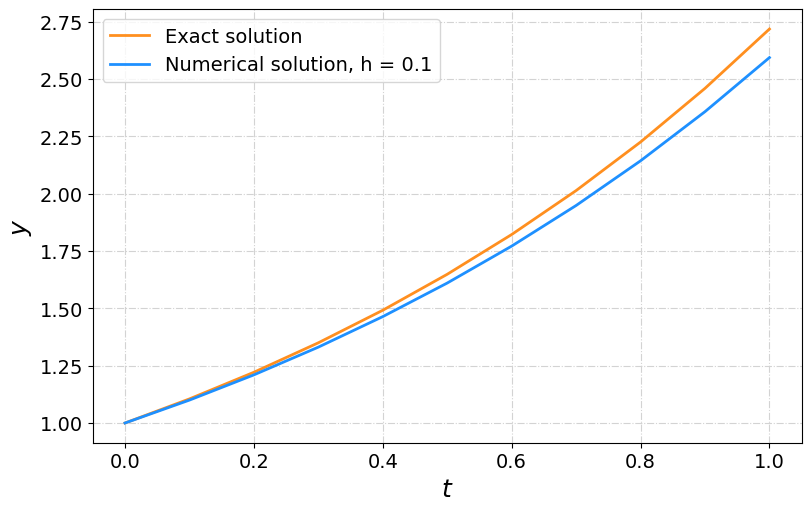

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)
ax.grid(True, ls="-.", c="lightgrey")
ax.plot(t, np.exp(t), lw=2, c="#FF8F1F", label="Exact solution")
ax.plot(t, y, lw=2, c="#1E90FF", label="Numerical solution, h = 0.1")
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc="best", fontsize=14)
plt.show()

As we can see, the numerical solution captures the general behaviour of the exact solution, but is not a very close match overall. To improve the accuracy of the numerical solution, we pick a lower value of $h$, for example $h = 0.001$.

In [9]:
h2 = 0.001

We then numerically solve the ODE with this new value of $h$.

In [10]:
t2, y2 = euler.solve(f, y0, t0, tf, h2)

Solving ODE...


100%|████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 97885.69it/s]

Solution complete! Time elapsed: 0 min 0.015 sec.


Adding this improved solution onto the previous plot, we get

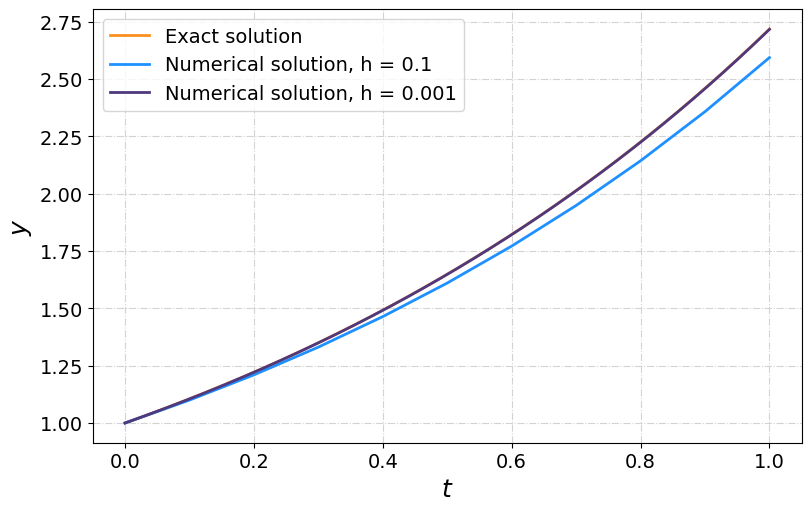

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)
ax.grid(True, ls="-.", c="lightgrey")
ax.plot(t2, np.exp(t2), lw=2, c="#FF8F1F", label="Exact solution")
ax.plot(t, y, lw=2, c="#1E90FF", label="Numerical solution, h = 0.1")
ax.plot(t2, y2, lw=2, c="#4E387E", label="Numerical solution, h = 0.001")
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc="best", fontsize=14)
plt.show()

As we can see, the $h = 0.001$ numerical solution almost perfectly matches the exact solution, indicating much better accuracy.